## Objective: 
Analyse tweets on a subject (economy) to identify -   
- the top hashtags associated with a target hashtag ('economy')

We'll need to perform a lot of clean up during the process. We will - 
- Normalize case
- Tokenize with specific rules
- Contextual stop word removal
- Cleanup - removal of URLs, User handles

Finally, we'll plot the top 10 hashtags that occurred along with '#economy' on a horizontal bar chart

In [1]:
import pandas as pd

In [2]:
inp_tweets0 = pd.read_csv("raw_tweets_economy.txt", sep="\t")
inp_tweets0.head()

,Unnamed: 0,0
0,0,Stocks losses deepen as a key recession warnin...
1,1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,2,AP Explains: Is the US economy nearing a reces...
3,3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,4,Who will stop mr. Mario Draghi and the ECB wit...


In [3]:
inp_tweets0.shape

(500, 2)

#### Drop the column '0', rename column '1' to 'tweet'

In [4]:
inp_tweets0.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
inp_tweets0.shape

(500, 1)

In [6]:
inp_tweets0.head()

,0
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


Renaming the column

In [10]:
inp_tweets0 = inp_tweets0.rename({'0':'tweet'}, axis=1)
inp_tweets0.head() 

,tweet
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


In [20]:
inp_tweets0['tweet'].sample(n=5).values

array(['🇪🇺📉 Stoxx 600 -0.43%\r\n🇩🇪📉 Dax -0.6%\r\n🇬🇧📉 FTSE 100 -0.83% \r\n #investing #world #economy #global https://t.co/xyCSdakd9Z',
       'RT @NorbertElekes: Share of GDP generated by tourism\r\n\r\nJapan:      1.9%\r\nUSA:         2.8%\r\nUK, India: 3.7%\r\nTurkey:     4.3%\r\n\r\nItaly:…',
       'RT @elerianm: #Bloomberg on the $2 billion stimulus package announced today by the #HongKong government this morning.\r\n\r\nTargeting both the h…',
       'The White House is sensitive to expectations for the economy and the financial markets. https://t.co/dKsX2DKcH8 via… https://t.co/1xCUb9Sjdk',
       'RT @F3NewsOfficial: #PM #Modi #Announces #Outlay Of #Rs.103.5 #Lakh #Crores For #Roadmap To #$5 #Trillion\xa0#Economy https://t.co/o7cmPFYKLv…'],
      dtype=object)

#### Get the tweets into a list, for easy text clean up and manipulation

In [21]:
tweets0 = inp_tweets0['tweet'].values

In [22]:
len(tweets0)

500

In [23]:
tweets0[:5]

array(['Stocks losses deepen as a key recession warning surfaces @GOP #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk',
       "RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews @realDonaldTrump \r\n#Trump is an ejit.\r\n#maga #TrumpTrain2020 #sheeple are idiot's.\r\n#farming #Trad…",
       'AP Explains: Is the US economy nearing a recession? \r\n#Business\r\n#Economy\r\n#Recession\r\n#TradeWar\r\n#China\r\n#EU… https://t.co/0jtsR2kSxi',
       'A @JobCreatorsUSA / https://t.co/JXEt7hQU4k survey completed Tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1XMiptADx',
       'Who will stop mr. Mario Draghi and the ECB with this counterproductive course of money dumping / zero interests? It… https://t.co/eweIrVuOK0'],
      dtype=object)

The tweets contain - 
1. URLs
2. Hashtags
3. User handles
4. 'RT'

## Cleanup 

#### Normalizing case

In [24]:
tweets_lower = [twt.lower() for twt in tweets0]

In [25]:
tweets_lower[:5]

['stocks losses deepen as a key recession warning surfaces @gop #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt @callmeahmjusayn: the #economy.\r\n@foxnews @realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a @jobcreatorsusa / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

#### Remove user handles, begin with '@'

In [26]:
import re

In [27]:
re.sub("@\w+","", "@Rahim this course rocks! http://rahimbaig.com/ai")

' this course rocks! http://rahimbaig.com/ai'

In [30]:
tweets_nouser = [re.sub("@\w+","", twt) for twt in tweets_lower]

In [31]:
tweets_nouser[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a  / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

#### Remove URLs

In [33]:
re.sub("\w+://\S+","", "@Rahim this course rocks! http://rahimbaig.com/ai")

'@Rahim this course rocks! '

In [34]:
tweets_nourl = [re.sub("\w+://\S+","", twt) for twt in tweets_nouser]

In [35]:
tweets_nourl[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… ',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… ',
 'a  /  survey completed tuesday, 56% rated the #economy as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ']

In [20]:
tweets_nourl[-5:]

['rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 'rt : #lebanon #beirut #politics #economy #commerce #funny #daily #media #crazy #science #food\r\n',
 'rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 "rt : rt.'s #facts #thread\r\n1). blames u.s. sanctions for #iran’s crumbling #economy. #blacklistirgc #corrupti…",
 '#primeminister  commits to pumping 1.4$tr into the #economy of #india via #infrastructure projects .… ']

#### Extracting only the hashtags from the tweets - remember, we want to analyse the most common hashtags in the tweets

In [36]:
re.findall("#\w+","I love this #love #life and fun")

['#love', '#life']

In [37]:
re.findall("#\w+","@Rahim #food is #love")

['#food', '#love']

In [38]:
hashtags0 = [re.findall('#\w+',twt) for twt in tweets_nourl]

In [40]:
hashtags0[:5]

[['#economy', '#fail', '#collapse', '#recession', '#gop', '#greed'],
 ['#economy',
  '#trump',
  '#maga',
  '#trumptrain2020',
  '#sheeple',
  '#farming',
  '#trad'],
 ['#business', '#economy', '#recession', '#tradewar', '#china', '#eu'],
 ['#economy'],
 []]

### Finding out the most common hashtags and plotting them

#### First, combining all the individuals lists into a single list, which can easily be passed to a counter

In [49]:
#Declaring an empty list which will later contain all the hashtags
all_hashtags = []

In [50]:
for k, twt in enumerate(hashtags0):
    all_hashtags.extend(twt)
    print(k, len(all_hashtags))

0 6
1 13
2 19
3 20
4 20
5 23
6 32
7 32
8 34
9 40
10 41
11 41
12 41
13 41
14 41
15 47
16 48
17 48
18 50
19 52
20 54
21 56
22 57
23 59
24 60
25 60
26 61
27 62
28 63
29 65
30 65
31 66
32 67
33 72
34 74
35 74
36 76
37 80
38 80
39 80
40 80
41 82
42 84
43 86
44 89
45 92
46 92
47 100
48 105
49 113
50 116
51 116
52 116
53 124
54 130
55 135
56 140
57 146
58 157
59 157
60 158
61 160
62 164
63 166
64 171
65 171
66 176
67 176
68 185
69 190
70 190
71 190
72 191
73 195
74 198
75 201
76 201
77 203
78 203
79 203
80 203
81 207
82 207
83 207
84 207
85 212
86 212
87 213
88 213
89 213
90 216
91 222
92 222
93 227
94 232
95 232
96 234
97 234
98 234
99 236
100 239
101 239
102 241
103 244
104 244
105 247
106 249
107 251
108 251
109 254
110 254
111 261
112 261
113 261
114 263
115 265
116 265
117 266
118 266
119 269
120 272
121 273
122 283
123 284
124 286
125 287
126 287
127 287
128 287
129 287
130 287
131 287
132 295
133 295
134 305
135 305
136 306
137 307
138 307
139 309
140 309
141 309
142 309
143 314
144 31

In [51]:
all_hashtags[:5]

['#economy', '#fail', '#collapse', '#recession', '#gop']

In [52]:
len(all_hashtags)

1061

In [62]:
# I want to find the no. of unique hashtags, other than #economy
hlist = list(set(all_hashtags))
hlist.remove('#economy')
len(hlist)

387

#### Removing '#economy' from the data, as this is what the tweets are about

In [63]:
stop_contextual = ['#economy']

#### Removing the contextual stopwords

In [64]:
all_hashtags = [tag for tag in all_hashtags if tag not in stop_contextual]

In [65]:
len(all_hashtags)

815

In [66]:
all_hashtags[:5]

['#fail', '#collapse', '#recession', '#gop', '#greed']

#### Using a counter to get the top hashtags

In [70]:
from collections import Counter

In [71]:
counts_hashtags = Counter(all_hashtags)

In [72]:
counts_hashtags.most_common(10)

[('#recession', 24),
 ('#india', 20),
 ('#business', 18),
 ('#hongkong', 17),
 ('#bloomberg', 15),
 ('#china', 12),
 ('#trump', 10),
 ('#markets', 9),
 ('#economics', 9),
 ('#infrastructure', 9)]

In [73]:
type(counts_hashtags)

collections.Counter

In [90]:
list(counts_hashtags.most_common())[-10:]

[('#currencytrading', 1),
 ('#beltandroad', 1),
 ('#671', 1),
 ('#50', 1),
 ('#131', 1),
 ('#2018', 1),
 ('#financialcrisis', 1),
 ('#wallstreet', 1),
 ('#dow', 1),
 ('#corrupti', 1)]

In [92]:
set(counts_hashtags.most_common()).difference(set(counts_hashtags.most_common(377)))

{('#131', 1),
 ('#2018', 1),
 ('#50', 1),
 ('#671', 1),
 ('#beltandroad', 1),
 ('#corrupti', 1),
 ('#currencytrading', 1),
 ('#dow', 1),
 ('#financialcrisis', 1),
 ('#wallstreet', 1)}

#### Plotting the top 10 hashtags

In [93]:
import matplotlib.pyplot as plt

In [94]:
res = counts_hashtags.most_common(10)

In [95]:
res2 = {term:cnt for term, cnt in res}

In [96]:
list(res2.keys())

['#recession',
 '#india',
 '#business',
 '#hongkong',
 '#bloomberg',
 '#china',
 '#trump',
 '#markets',
 '#economics',
 '#infrastructure']

In [97]:
list(res2.values())

[24, 20, 18, 17, 15, 12, 10, 9, 9, 9]

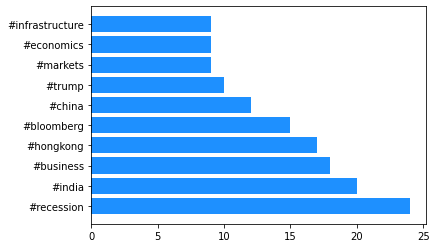

In [99]:
plt.barh(list(res2.keys()), list(res2.values()), color="dodgerblue")
plt.show()

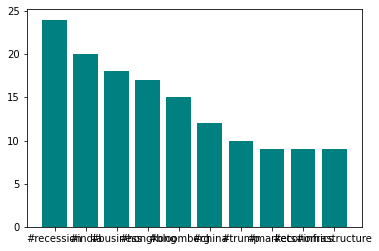

In [101]:
plt.bar(list(res2.keys()), list(res2.values()), color="teal")
plt.show()